<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Logistic Regression

# Intro

Tonight we are talking about logistic regression, which despite its name is a classification algorithm.

**Exercise (2 mins.)** Slack poll.

/poll “Which of the following are classification (as opposed to regression) problems? (Select all that apply.)” “Predicting how many people will come to a meetup event.” “Predicting which of the people who signed up for a meetup will actually attend.” “Predicting the price that a house will sell for, based on its zip code and square footage.” “Assigning probabilities of experiencing a fire in the next six months to buildings in a city.” “Identifying animals in photographs by species.”

/scrub/

2, 4, 5. 4 is tricky, because it does produce a number. You can think of it as modeling probabilities as numbers, like a regression algorithm. I think that's why logistic regression is called logistic *regression*. But producing probabilities for discrete categories is just a fuzzy way of addressing a classification problem, so we will call algorithms that do so classification algorithms.

$\blacksquare$

<a id="refresher-fitting-and-visualizing-a-linear-regression-using-scikit-learn"></a>
# Refresher: Fitting and Visualizing a Linear Regression Using scikit-learn

Use Pandas to load in the glass attribute data from the UCI machine learning website. The columns are different measurements of properties of glass that can be used to identify the glass type. For detailed information on the columns in this data set, [please see the included .names file](http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names).

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.5);

In [2]:
%matplotlib inline

In [3]:
glass_filepath = Path('..', 'assets', 'data', 'glass.csv')
glass = pd.read_csv(glass_filepath)

In [4]:
# change columns to something more uniform
glass.columns = ['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe', 'glass_type']

**Data Dictionary**

1. `ri`: refractive index
- `na`: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 3-9)
- `mg`: Magnesium
- `al`: Aluminum
- `si`: Silicon
- `k` : Potassium
- `ca`: Calcium
- `ba`: Barium
- `fe`: Iron
- `glass_type`: type of glass:
    - 1 building_windows_float_processed 
    - 2 building_windows_non_float_processed 
    - 3 vehicle_windows_float_processed 
    - 4 vehicle_windows_non_float_processed (none in this database) 
    - 5 containers 
    - 6 tableware 
    - 7 headlamps
    
The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence, if it is correctly identified.

In [5]:
# Inspect data
# /scrub/
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
# Examine glass_type.
# /scrub/
glass.loc[:, 'glass_type'].value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

**Let's build a regression model estimator for refractice index against aluminum content.**

/Users/gGandenberger/anaconda3/envs/py37/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


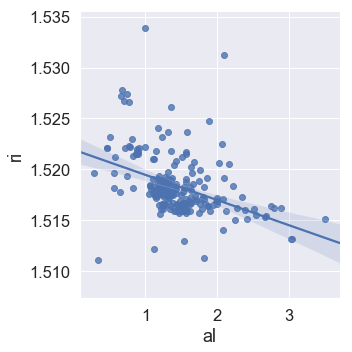

In [7]:
# Create a scatter with a regression line
# /scrub/
g = sns.lmplot(x='al', y='ri', data=glass)

**Exercise (14 mins., in pairs)**

- Instantiate and train a linear regression estimator called `linreg` to predict `ri` from `al` (and an intercept).

In [8]:
# /scrub/
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

feature_cols = ['al']
X = glass.loc[:, feature_cols]
y = glass.loc[:, 'ri']

linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

- Add a column `y_pred` to `glass` that stores the estimator's fitted values for the refractice index.

In [9]:
# /scrub/
y_pred = linreg.predict(X)
glass.loc[:, 'y_pred'] = y_pred

- Plot the predicted `ri` against each `al` as a line.

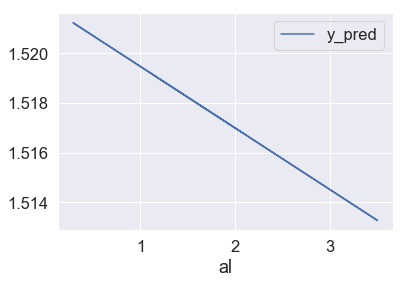

In [10]:
# /scrub/
ax = glass.plot(x='al', y='y_pred')

_Note the y axis labels when comparing to the scatterplot above._

- Plot this regression line with the scatter points on the same chart. (Use the predictions from the sklearn model rather than calling Seaborn's lmplot function.)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


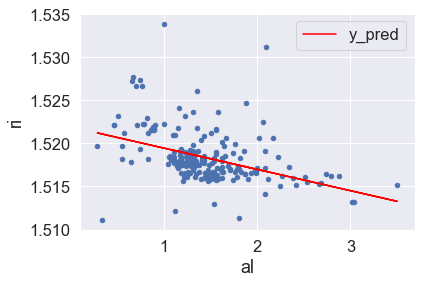

In [11]:
# /scrub/
ax = glass.plot(x='al', y='y_pred', color='red')
glass.plot(kind='scatter', x='al', y='ri', ax=ax);

- How good would you say that this model is, based on the graph? Suggestion: think about how it compares to a "null model" that just predicts the mean reflective index regardless of the aluminum content.

/scrub/

This model appears to be a little better than the null model -- the points are mostly above the mean for `al` < 1 and below it for `al` > 2, and our model recognizes this pattern while the null model doesn't. That being said, the predictions our model don't deviate from those of the null model by very much compared to the range of the `ri` values, so it's not doint a great job capturing the variation in `ri`.

- Print out the intercept and coefficient values from our trained `LinearRegression` estimator.

In [12]:
# /scrub/
print(linreg.intercept_)
print(linreg.coef_)

1.5219453302386425
[-0.00247761]


- What do these numbers mean?

/scrub/

**Coefficient interpretation:** A 1-unit increase in `al` is associated with a ~0.0025-unit decrease in `ri`.

**Intercept interpretation:** When `al = 0`, the estimated value of `ri` is 1.52194533024.

- Manually compute the predicted value of `ri` when `al=2.0` using the regression equation.

In [13]:
# /scrub/
linreg.intercept_ + linreg.coef_[0] * 2

1.5169901174637033

- Confirm that this is the same value we would get when using the built-in `.predict()` method of the `LinearRegression` object.

In [14]:
# /scrub/
linreg.predict([[2]])

array([1.51699012])

$\blacksquare$

<a id="predicting-a-categorical-response"></a>
# Predicting a Single Categorical Response

Linear regression is appropriate when we want to predict the value of a continuous target/response variable, but what about when we want to predict membership in a class or category?

Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Create a new `household` column that indicates whether or not a row is household glass, coded as 1 or 0, respectively.**

In [15]:
# Types 1, 2, 3 are window glass.
# Types 5, 6, 7 are household glass.
# /scrub/
glass.loc[:, 'household'] = glass.loc[:, 'glass_type'].map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0


Let's change our task, so that we're predicting the `household` category using `al`. Let's visualize the relationship to figure out how to do this.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


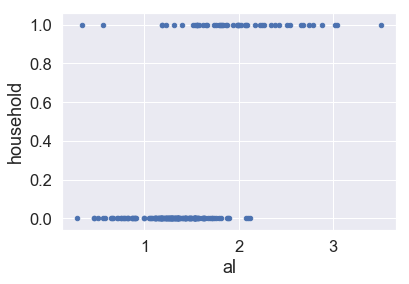

In [16]:
# Make a scatter plot comparing `al` and `household`
# /scrub/
ax = glass.plot(kind='scatter', x='al', y='household')

**Fit a new `LinearRegression` predicting `household` from `al`.**

Let's draw a regression line like we did before:

In [17]:
# Fit a linear regression estimator and store the predictions.
# /scrub/
feature_cols = ['al']
X = glass.loc[:, feature_cols] 
y = glass.loc[:, 'household'] 
linreg.fit(X, y)
glass.loc[:, 'household_pred'] = linreg.predict(X)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


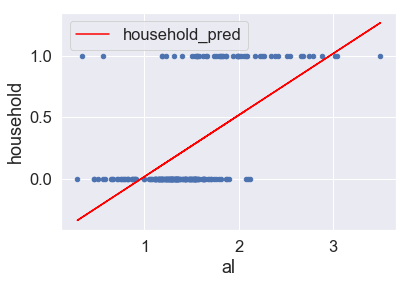

In [18]:
# Scatter plot that includes the regression line
# /scrub/
ax = glass.plot(kind='scatter', x='al', y='household')
glass.plot(x='al', y='household_pred', color='red', ax=ax);

If **al=3**, what class do we predict for household? **1**

If **al=1.5**, what class do we predict for household? **0**

We predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

In [19]:
# Using this threshold, create a new column of our predictions for whether a row is household glass.

# np.where returns the first value if the condition is True,
# and the second value if the condition is False.
# /scrub/
import numpy as np
nums = np.array([5, 15, 8])

np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [20]:
# Transform household_pred to 1 or 0.
# /scrub/
glass.loc[:, 'household_pred_class'] = np.where(glass.loc[:, 'household_pred'] >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,0.065459,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,0.195765,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,0.285976,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,0.160682,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,0.135623,0


In [21]:
# sort so we can have a continuous line
# /scrub/
glass.sort_values('al', inplace=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


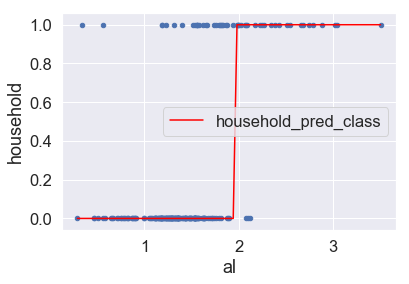

In [22]:
# Plot the class predictions.
# /scrub/
ax = glass.plot(kind='scatter', x='al', y='household')
glass.plot(x='al', y='household_pred_class', c='red', ax=ax);

Linear regression yields a reasonable binary classifier in this case when we map values above 0.5 to 1 and values below 0.5 to 0.

**So why not just use linear regression for classification?**

## Reason 1 to use logistic over linear regression for classification: pre-threshold output can be interpreted as probabilities

It would be nice if we could also interpret the raw numbers it gives us, e.g. as probabilities. The problem is that linear regression is unbounded. As a result, it gives values below 0 and above 1, which cannot be probabilities.

This is where logistic regression comes in: it basically takes that linear regression line and bends its ends into an S-shape so that it always stays between 0 and 1, so that we can interpret its outputs as probabilities.

In [23]:
# Fit a logistic regression estimator and store the class predictions.
# /scrub/
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['al']
X = glass.loc[:, feature_cols]
y = glass.loc[:, 'household']

logreg.fit(X,y)
pred = logreg.predict(X)

/Users/gGandenberger/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


> **Aside:** Whereas linear regression minimizes squared error, logistic regression minimizes *log-loss* (also known as *cross-entropy*). See [this article](http://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression/) for a detailed explanation.

**Plot the predicted class using the logistic regression as we did for the linear regression predictions above.**

As you will see, the class predictions are nearly the same in this case.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


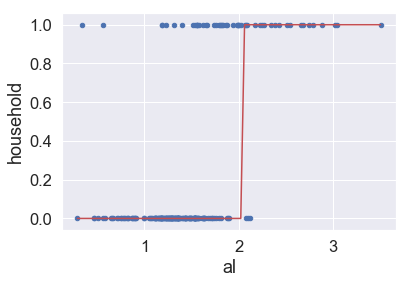

In [24]:
# Plot the predicted class using the logistic regression as we did for the linear regression predictions above.
# /scrub/
ax = glass.plot(kind='scatter', x='al', y='household')
ax.plot(glass.loc[:, 'al'], np.array(pred), c='r');

In this case, the class predictions are nearly the same.

What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

In [25]:
# Examine the predicted probabilities for the first handful of rows of `X`.
# /scrub/
logreg.predict_proba(X)[0:10]

array([[0.97193375, 0.02806625],
       [0.96905681, 0.03094319],
       [0.96017962, 0.03982038],
       [0.96017962, 0.03982038],
       [0.9569876 , 0.0430124 ],
       [0.95265323, 0.04734677],
       [0.95265323, 0.04734677],
       [0.95080573, 0.04919427],
       [0.94378757, 0.05621243],
       [0.94271112, 0.05728888]])

Sklearn orders the columns according to our class labels. The two-column output of `predict_proba` returns a column for each class of our `household` variable. The first column is the probability of `household=0` for a given row, and the second column is the probability of `household=1`.

**Store the predicted probabilities of class=1 in its own column in the data set.**

In [26]:
# Store the predicted probabilities of class 1.
# /scrub/
glass.loc[:, 'household_pred_prob'] = logreg.predict_proba(X)[:, 1]
glass.head()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


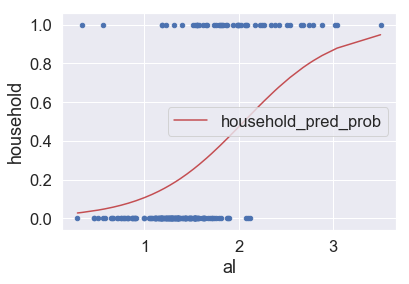

In [28]:
# Plot the predicted probabilities.
# /scrub/
ax = glass.plot(kind='scatter', x='al', y='household')
glass.plot(x='al', y='household_pred_prob', c='r', ax=ax);

In [29]:
# Examine some example predictions.
# /scrub/
print(logreg.predict_proba([[1]]))
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[3]]))

[[0.89253652 0.10746348]]
[[0.52645662 0.47354338]]
[[0.12953623 0.87046377]]


## Reason 2 to use logistic rather than linear regression for classification: it handles "influential points" better.

In [30]:
# Adding an extreme point. Don't worry about this code.
glass_augmented = pd.concat([glass, glass.iloc[[-1], :]])
glass_augmented.reset_index(inplace=True)
glass_augmented.loc[214, ['al', 'household']] = [15, 1]
glass_augmented.tail()

,index,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class,household_pred_prob
210,209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1.514810,1,0.957554,1,0.840740
211,172,1.51321,13.00,0.00,3.02,70.70,6.21,6.93,0.00,0.0,5,1.514463,1,1.027718,1,0.874932
212,171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.0,5,1.514413,1,1.037742,1,0.879267
213,163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.0,5,1.513274,1,1.268283,1,0.948366
214,163,1.51514,14.01,2.68,15.00,69.89,1.68,5.87,2.20,0.0,5,1.513274,1,1.268283,1,0.948366


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


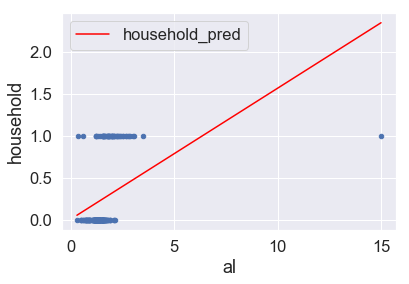

In [31]:
# Linear regression line is greatly affected by the extreme point
feature_cols = ['al']
X = glass_augmented[feature_cols] 
y = glass_augmented.loc[:, 'household'] 
linreg.fit(X, y)
glass_augmented.loc[:, 'household_pred'] = linreg.predict(X)

ax = glass_augmented.plot(kind='scatter', x='al', y='household')
glass_augmented.plot(x='al', y='household_pred', color='red', ax=ax);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


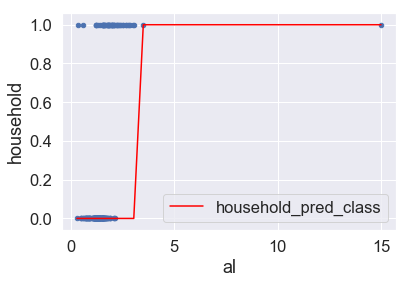

In [32]:
# Predictions from thresholded linear regression line no longer look sensible
glass_augmented.loc[:, 'household_pred_class'] = np.where(
    glass_augmented.loc[:, 'household_pred'] >= 0.5, 1, 0
    )
glass_augmented.head()

ax = glass_augmented.plot(kind='scatter', x='al', y='household')
glass_augmented.plot(x='al', y='household_pred_class', color='red', ax=ax);

/Users/gGandenberger/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


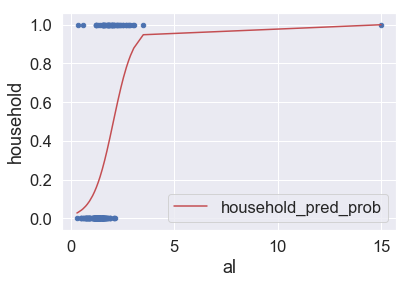

In [33]:
# Logistic regression handles this case much better, because the
# model converges toward 1 instead of flying off to infinity.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['al']
X = glass_augmented.loc[:, feature_cols]
y = glass_augmented.loc[:, 'household']

logreg.fit(X,y)
pred = logreg.predict(X)

glass_augmented.loc[:, 'household_pred_prob'] = logreg.predict_proba(X)[:, 1]
ax = glass_augmented.plot(kind='scatter', x='al', y='household')
glass_augmented.plot(x='al', y='household_pred_prob', c='r', ax=ax);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


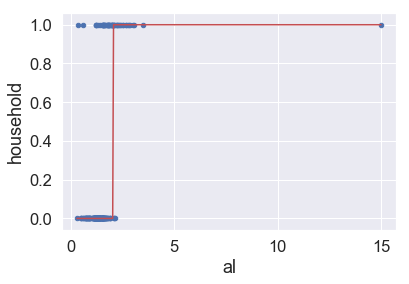

In [34]:
ax = glass_augmented.plot(kind='scatter', x='al', y='household')
ax.plot(glass_augmented.loc[:, 'al'], np.array(pred), c='r');

**Summary**

- You can think of logistic regression as taking linear regression and adapting it to classification problems by "bending" the regression line into a "sigmoidal" (s-like) shape that is bounded by 0 and 1.
- Two result has at least two advantages over simply using linear regression with a threshold for classification:
    - Before thresholding, it produces numbers that we can interpret as probabilities.
    - Because it stays between 0 and 1 instead of flying off to infinity, it handles extreme points better.

**Exercise (5 mins.)**

- Build a logistic regression estimator for `household` using two features of your choice.

In [35]:
# /scrub/
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
X = glass.loc[:, ['na','fe']]
y = glass.loc[:, 'household']

- Do a simple train-test split on `glass`.

In [36]:
# /scrub/
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

- Train your estimator on the training set and evaluate it with `.score` on the test set.

In [37]:
# /scrub/
LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

LR.score(X_test, y_test)

/Users/gGandenberger/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8148148148148148

- **BONUS:** Try out different sets of features to see which give the best results.

$\blacksquare$

<a id="probability-odds-ratio-e-log-and-log-odds"></a>
## Understanding Logistic Regression
---

**Recall:** A coefficient in a *linear regression* model tells you how the *number* predicted by the model changes when the associated variable increases by one and all other variables remain the same.

**Similarly**, A coefficient in a *logistic regression* model tells you how the *log odds* predicted by the model changes when the associated variable increases by one and all other variables remain the same.

Let's try to develop some intuitions about log odds to help us reason about our logistic regression models. *Understanding this material is helpful, but don't panic if it goes over your head -- you can get a long way without it.*

#### Odds

When outcomes are equally likely,

$$\text{probability} = \frac {\text{number of favorable outcomes}} {\text{total number of possible outcomes}}$$

$$\text{odds} = \frac {\text{number of favorable outcomes}} {\text{number\ of\ unfavorable\ outcomes}}$$

It is often useful to think of the numeric odds as a ratio. For example, 5/1 = 5 odds is "5 to 1" -- five wins for every one loss (e.g. of six total plays). 2/3 odds means "2 to 3" -- two wins for every three losses (e.g. of five total plays).

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$\text{odds} = \frac {\text{probability}} {1 - \text{probability}}$$

In [38]:
# Create a table of probability versus odds.
# /scrub/
table = pd.DataFrame({'probability': [0.1 * num for num in range(11)]})
table['odds'] = table.probability / (1 - table.probability)
table

,probability,odds
0,0.0,0.000000
1,0.1,0.111111
2,0.2,0.250000
3,0.3,0.428571
4,0.4,0.666667
5,0.5,1.000000
6,0.6,1.500000
7,0.7,2.333333
8,0.8,4.000000
9,0.9,9.000000


**Exercise (4 mins., in groups)**

Convert the following probabilities to odds:

- .25

/scrub/

1:3

- 1/3

/scrub/

1:2

- 2/3

/scrub/

2:1

- .95

/scrub/

19:1

$\blacksquare$

<a id="understanding-e-and-the-natural-logarithm"></a>
### Understanding the Natural Logarithm

A logarithm tells you the *order of magnitude* of a number. The base-10 logarithm is a continuous version of "the number of times you would need to multiply 10 to get that number."

| number | number as a power of 10 | $\log_{10}$(number) |
| ------ | ----------------------------- | --- |
| $1 $|$ 10^0$ | 0 |
| $10 $|$ 10^1$ | 1 |
| $100 $|$ 10^2$ | 2 |
| $1000 $|$ 10^3$ | 3 |

It also works in the other direction:

| number | number as a power of 10 | $\log_{10}$(number) |
| ------ | ----------------------------- | -- |
| $.001 $ | $ 10^{-3}$ | -3 |
| $.01 $ | $ 10^{-2}$ | -2 |
| $.1 $|$ 10^{-1}$ | -1 |
| $1 $|$ 10^0$ | 0 |

And for numbers in between exact powers of 10:

| number | number as a power of 10 | $\log_{10}$(number) |
| ------ | ----------------------------- | -- |
| $1$ | $ 10^{0}$ | 0 |
| $2$ | $ 10^{.301}$ | .301 |
| $5$|$ 10^{.699}$ | .699 |
| $10$|$ 10^1$ | 1 |
| $20$|$ 10^{1.301}$ | 1.301 |
| $50$|$ 10^{1.699}$ | 1.699 |
| $100$|$ 10^2$ | 2 |

**Base $e$.** It is often convenient to use the special number $e$ as a base instead of 10. The interpretation is analogous: the base-$e$ logarithm of a number is a continuous version of "the number of times you would have to multiple $e$ to get that number."

For instance:

| number | number as a power of $e$ | $\log_{e}$(number) |
| ------ | ----------------------------- | - |
| $1 $|$ e^0$ | 0 |
| $2.718$|$ e^1$ | 1 |
| $7.39$|$ e^2$ | 2 |
| $20.09$|$ e^3$ | 3 |

It also works in the other direction:

| number | number as a power of $e$ | $\log_{e}$(number) |
| ------ | ----------------------------- | - |
| $.050 $ | $ e^{-3}$ | -3 |
| $.135 $ | $ e^{-2}$ | -2 |
| $.368 $|$ e^{-1}$ | -1 |
| $1 $|$ e^0$ | 0 |

And for numbers in between exact powers of $e$:

| number | number as a power of $e$ | $\log_{e}$(number) |
| ------ | ----------------------------- | - |
| $1$ | $ e^{0}$ | 0 |
| $1.35$ | $ e^{.301}$ | .301 |
| $2.01$|$ e^{.699}$ | .699 |
| $2.718$|$ e^1$ | 1 |
| $3.67$|$ e^{1.301}$ | 1.301 |
| $5.47$|$ e^{1.699}$ | 1.699 |
| $7.39$|$ e^2$ | 2 |

When we take the **logarithm** of an **odds** we get the **log odds**.

The most common convention is to use base-$e$ logarithms unless otherwise specified.

In [39]:
# Add log odds to the table.
# /scrub/
table['logodds'] = np.log(table['odds'])
table

/Users/gGandenberger/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


,probability,odds,logodds
0,0.0,0.000000,-inf
1,0.1,0.111111,-2.197225
2,0.2,0.250000,-1.386294
3,0.3,0.428571,-0.847298
4,0.4,0.666667,-0.405465
5,0.5,1.000000,0.000000
6,0.6,1.500000,0.405465
7,0.7,2.333333,0.847298
8,0.8,4.000000,1.386294
9,0.9,9.000000,2.197225


**Notice:** log odds goes to $-\infty$ as probability goes to 0, and goes to $\infty$ as probability goes to 1.

**Consequence:** The fact that linear model is unbounded is fine if we use it to model *log odds* rather than *probability*.

<a id="what-is-logistic-regression"></a>
### What Is Logistic Regression?
---

**Linear regression:** *Continuous response* is modeled as a linear combination of the features.

$$y = \beta_0 + \beta_1x$$

**Logistic regression:** *Log odds* is modeled as a linear combination of the features.

$$\log \left(\frac{p}{1-p}\right) = \beta_0 + \beta_1x$$

This equation can be rearranged to get the predicted probability:

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

This equation gives us the "S" (sigmoid) shape for the predicted probability as a function of $\beta_1$.

### How do we interpret the regression parameters?

**Linear regression:**

$$y = \beta_0 + \beta_1x$$

- $\beta_0$ tells you the model's prediction for $y$ when all input features are zero.
- $\beta_1$ tells you how the model's prediction for $y$ changes with a one-unit increase in $x$ when all other variables remain the same.

**Logistic regression:**

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

- $\beta_0$ tells you the model's prediction for the *log odds of $y$* when all input features are zero.
- $\beta_1$ tells you how the model's prediction for *the log odds of* $y$ changes with a one-unit increase in $x$ when all other variables remain the same.

**Bottom line:** A positive coefficient means that the predicted log odds of the response (and thus the predicted probability) increases with the associated variable, while a negative coefficient means that it decreases.

![Logistic regression beta values](../assets/images/logistic_betas.png)

Changing the $\beta_0$ value shifts the curve horizontally, whereas changing the $\beta_1$ value changes the slope of the curve.

### Summary

- Logistic regression addresses a binary classification problem by modeling the *log odds* that an individual is in the class as a linear function of the model features.
- A coefficient in a logistic regression model tells you *how the log odds that the model predicts changes* with a one-unit increase in the associated input feature, while other features remain unchanged.
- The model's log-odds predictions can be transformed into *probabilities*.
- Those predicted probabilities follow an "s" (sigmoid) shape that is bounded by 0 and 1, as a function of the input features.
- Those predicted probabilities can be converted into "hard" class predictions by mapping everything above a threshold to 1 and everything below it to 0.

<a id="comparing-logistic-regression-to-other-models"></a>
## Comparing Logistic Regression to Other Models
---

Advantages of logistic regression:

- Somewhat interpretable.
- Training and prediction are fast.
- Outputs probabilities.
- Features don't need scaling.
- Can perform well with a small number of observations.

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log odds of the response.
- Performance is (generally) not competitive with the best supervised learning methods.
- Can't automatically learn feature interactions.

<a id="advanced-classification-metrics"></a>
# Classification Metrics Beyond Accuracy

By default, the `.score` method of a logistic regression estimator in sklearn returns accuracy:

$$\text{Accuracy} = \frac{\text{total predicted correct}}{\text{total predicted}}$$

However, accuracy is not always the most relevant metric.

Consider the **confusion matrix** for a binary classification problem where we have 165 observations/rows of people who are either smokers or nonsmokers.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"><font color="blue">TN = 50</font></td>
    <td style="text-align: center"><font color="red">FP = 10</font></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"><font color="orange">FN = 5</font></td>
    <td style="text-align: center"><font color="green">TP = 100</font></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>


- <font color="green">**True positives (TP):**</font> These are cases in which we predicted yes (smokers), and they actually are smokers.
- <font color="blue">**True negatives (TN):**</font> We predicted no, and they are nonsmokers.
- <font color="red">**False positives (FP):**</font> We predicted yes, but they were not actually smokers. (This is also known as a "Type I error.")
- <font color="orange">**False negatives (FN):**</font> We predicted no, but they are smokers. (This is also known as a "Type II error.")

**Exercise (3 mins., in groups).**

Categorize these cases as TP, TN, FP, or FN.
    
- We predict that a growth is malignant, and it is benign. (is_malignant=1)

/scrub/

FP

- We predict that an image does not contain a cat, and it does not. (has_cat=1)

/scrub/

TN

- We predict that a locomotive will fail in the next two weeks, and it does. (breaks=1)

/scrub/

TP

- We predict that a user will like a song, and she does not. (likes_song=1)

/scrub/

FP

$\blacksquare$

<a id="accuracy-true-positive-rate-and-false-negative-rate"></a>
### Accuracy, True Positive Rate, and False Negative Rate

**Accuracy:** Overall, how often is the classifier correct?

<span>
    (<span style="color: green">TP</span>+<span style="color: blue">TN</span>)/<span style="color: purple">total</span> = (<span style="color: green">100</span>+<span style="color: blue">50</span>)/<span style="color: purple">165</span> = 0.91
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom; color: purple">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center; background-color: blue">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center; background-color: green">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**True positive rate (TPR)** asks, “Out of all of the target class labels, how many were accurately predicted to belong to that class?”

For example, given a medical exam that tests for cancer, how often does it correctly identify patients with cancer?

<span>
<span style="color: green">TP</span>/<span style="color: aqua">actual yes</span> = <span style="color: green">100</span>/<span style="color: aqua">105</span> = 0.95
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center;background-color: green">TP = 100</td>
    <td style="text-align: center;color: aqua">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**False positive rate (FPR)** asks, “Out of all items not belonging to a class label, how many were predicted as belonging to that target class label?”

For example, given a medical exam that tests for cancer, how often does it trigger a “false alarm” by incorrectly saying a patient has cancer?

<span>
<span style="color: orange">FP</span>/<span style="color: fuchsia">actual no</span> = <span style="color: orange">10</span>/<span style="color: fuchsia">60</span> = 0.17
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center;background-color: orange">FP = 10</td>
    <td style="text-align: center;color:fuchsia">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Exercise (5 mins., in groups)**

We turn the probabilities output by a logistic regression model into "hard" predictions by setting a threshold. For instance, we might treat all probabilities above .5 as positive predictions and the rest as negative predictions.

- Does the true positive rate of a logistic regression model increase or decrease if we change the threshold probability for treating a prediction as positive from .5 to .6?

/scrub/

It decreases.

- Does the false positive rate of a logistic regression model increase or decrease if we change the threshold probability for treating a prediction as positive from .5 to .6?

/scrub/

It increases.

- Describe a situation in which you would want to use a high threshold probability.

/scrub/

When the cost of false positive is higher than the cost of a false negative -- for instance, in delivering guilty verdicts in criminal justice.

- Describe a situation in which you would want to use a low threshold probability.

/scrub/

When the cost of false negative is higher than the cost of a false positive -- for instance, when screening for a dangerous but treatable disease.

- Calculate the accuracy, true positive rate, and false positive rate for the confusion matrix below.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 140</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">30</td>
    <td style="text-align: center">10</td>
    <td style="text-align: center">40</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">60</td>
    <td style="text-align: center">40</td>
    <td style="text-align: center">100</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">90</td>
    <td style="text-align: center">50</td>
</tr>

</table>

/scrub/

- **Accuracy:** (30+40)/(30+10+60+40) = 70/140 = 50%
- **True Positive Rate:** 40/(60+40) = 40/100 = 40%
- **False Positive Rate:** 10/(30+10) = 10/40 = 25%

- **BONUS:** Calculate the true negative rate and false negative rate for that confusion matrix.

/scrub/

- **True Negative Rate:** 30/40 = 75%
- **False Negative Rate:** 60/100 = 60%

$\blacksquare$

### Example

The true positive and false positive rates gives us a much clearer picture of where predictions begin to fall apart.

In [40]:
admissions_path = Path('..', 'assets', 'data', 'admissions.csv')
admissions = pd.read_csv(admissions_path).dropna()
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [41]:
from sklearn import model_selection

# Split data, train model
# /scrub/
feature_cols = ['gre']
X = admissions.loc[:, feature_cols]
y = admissions.loc[:, 'admit']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=46)
logit_simple = LogisticRegression()
logit_simple.fit(X_train, y_train)

/Users/gGandenberger/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
# Score model
# /scrub/
logit_simple.score(X_test, y_test)

0.64

In [43]:
# Compare to null model
# first create an array with the same shape as y
# then fill it in with the most common value -- numpy "broadcasts" the sum over the whole array
# /scrub/
most_common_value = y_train.value_counts().idxmax()
null_pred = np.zeros(y_test.shape) + most_common_value
null_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
from sklearn import metrics

## then compare predicting the mean every time to the true values
null_accuracy = metrics.accuracy_score(null_pred, y_test)
null_accuracy

0.64

In [45]:
# Get the confusion matrix
# /scrub/
logit_pred_proba = logit_simple.predict_proba(X_test)[:,1]
y_pred = logit_pred_proba > .5
metrics.confusion_matrix(y_test, y_pred)

array([[64,  0],
       [36,  0]])

**Exercise (2 mins.)**

- What is our model doing?

/scrub/

Predicting "no" every time.

- What is the model's accuracy on the test set?

/scrub/

64%

- What is the model's true positive rate on the test set?

/scrub/

0

- What is the model's false positive rate on the test set?

/scrub/

0

$\blacksquare$

In [46]:
# Change the classification threshold for our model to get different predictions.
# /scrub/
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .3)

array([[25, 39],
       [ 9, 27]])

In [47]:
# Use crosstab to get the confusion matrix with labeled rows and columns
# /scrub/
pd.crosstab(y_test, logit_pred_proba > .3, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,False,True,All
True,,,
0,25,39,64
1,9,27,36
All,34,66,100


**Exercise (3 mins.)**

- What is the model's accuracy on the test set?

/scrub/

52%

- What is the model's true positive rate on the test set?

/scrub/

27/(27+9) = 27/36 = 75%

- What is the model's false positive rate on the test set?

/scrub/

39/(39+25) = 39/64 = 61%

$\blacksquare$

### Accuracy

**Advantages:**

- Intuitive: it's a lot like an exam score where you get total correct/total attempted.

**Disadvantages:**

- Potentially misleading: Can look OK when model is just outputting the most common label.
    - Particularly bad when classes are imbalanced -- e.g. train doesn't break 99% of the time, so a model that always says "won't break" has 99% accuracy -- but it fails exactly when we need it!
- Doesn't account for relative costs of false positives and false negatives.
- Doesn't say anything about how far predicted probabilities are from the correct labels.

**Other metrics to investigate:**
    
- **Classification error:** Proportion of incorrect predictions (1-accuracy, lower is better).
- **Receiver Operating Characteristic (ROC) curves:** True positive rate vs. false positive rate across all possible threshold probabilities. The **area under the ROC curve** (AUC) is a measure of how well your model performs overall across those thresholds.
  - Allows you to visualize the performance of your classifier across all possible classification thresholds, thus helping you to choose a threshold that appropriately balances true positives and false positives.
  - Still useful when there is high class imbalance (unlike classification accuracy/error).
  - Harder to use when there are more than two response classes.
- **Log loss**: Measures how far the output probabilities are from the correct labels. (Useful when you want to make expected value calculations with those probabilities or triage cases for further attention.)
- **True Negative Rate**, **False Negative Rate**
- **Recall** (a.k.a. True Positive Rate), **Precision** (proportion of positive predictions that are true)

These measures are all readily available in sklearn.

## Lesson Review

- Does logistic regression address regression or classification problems?
- What do the coefficients in a logistic regression represent? How is the way we interpret them different from how we interpret coefficients in a linear regression model? How is it similar?
- Why isn't accuracy all you need to evaluate classification models?
- How can you tune a model based on the relative costs of false positives and false negatives?